In [161]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir("../Python-ILP"))

['hello.py', 'result.svg', 'FIFA 19.ipynb', 'Day 10 - 11 GUI, File and exception.ipynb', 'output.json', 'gamersky_08origin_15_2019321457125.jpg', 'gamersky_10origin_19_2019391551823.jpg', 'Day 12-13 Strings and regular expressions, Process and thread.ipynb', 'data.json', 'c.txt', 'news.json', 'b.txt', 'a.txt', 'Day 15 Pics.ipynb', '1.txt', '.ipynb_checkpoints', 'Day 16 - 20.ipynb', '.git', 'Day 01-06.ipynb', 'Day 07-.ipynb', 'Day 08 - 09 OO.ipynb', 'Matplotlib and Data visualization.ipynb', 'Day 14 Introduction to Network Programming.ipynb', 'fifa19.csv']


In [15]:
data = pd.read_csv('../Python-ILP/fifa19.csv')
print(data.shape)

(18207, 89)


In [130]:
using_columns = [
    'Name', 
    'Age', 
    'Photo', 
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club',
    'Position',
    'Value', 
    'Wage',     
    'Release Clause'
]
dataset = pd.DataFrame(data, columns = using_columns)

In [131]:
dataset.head()

,Name,Age,Photo,Nationality,Overall,Potential,Club,Position,Value,Wage,Release Clause
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,RF,€110.5M,€565K,€226.5M
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,ST,€77M,€405K,€127.1M
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,LW,€118.5M,€290K,€228.1M
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,GK,€72M,€260K,€138.6M
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,RCM,€102M,€355K,€196.4M


In [132]:
#Check null
dataset.isnull().sum()

Name                 0
Age                  0
Photo                0
Nationality          0
Overall              0
Potential            0
Club               241
Position            60
Value                0
Wage                 0
Release Clause    1564
dtype: int64

In [133]:
dataset['Club'].fillna('Null', inplace = True)
dataset['Release Clause'].fillna('€0K', inplace = True)

In [134]:
dataset.describe()

,Age,Overall,Potential
count,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299
std,4.669943,6.908930,6.136496
min,16.000000,46.000000,48.000000
25%,21.000000,62.000000,67.000000
50%,25.000000,66.000000,71.000000
75%,28.000000,71.000000,75.000000
max,45.000000,94.000000,95.000000


In [135]:
#Number of countries and top 5 countries with highest number of players
print('Total country numbers are : {0}'.format(dataset['Nationality'].nunique()))
print(dataset['Nationality'].value_counts().head(5))

Total country numbers are : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


In [136]:
###### Top 5 players who have maximum potential and overall
print('Maximum Potential : '+str(dataset.loc[dataset['Potential'].idxmax()][0]) + ' with '+ str(dataset.loc[dataset['Potential'].idxmax()][5]))
print('Maximum Overall Perforamnce : '+str(dataset.loc[dataset['Overall'].idxmax()][0]) + ' with ' + str(dataset.loc[dataset['Overall'].idxmax()][4]))

Maximum Potential : K. Mbappé with 95
Maximum Overall Perforamnce : L. Messi with 94


In [137]:
#Convert M, K values to numbers
def to_num(value):
    if value[-1] == 'M':
        return float(value[1:-1])*1000000
    elif value[-1] == 'K':
        return float(value[1:-1])*1000
    else:
        return float(value[1:])
    
dataset['Value'] = dataset['Value'].apply(lambda x: to_num(x))
dataset['Wage'] = dataset['Wage'].apply(lambda x: to_num(x))
dataset['Release Clause'] = dataset['Release Clause'].apply(lambda x: to_num(x))

In [138]:
dataset.head()

,Name,Age,Photo,Nationality,Overall,Potential,Club,Position,Value,Wage,Release Clause
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,RF,110500000.0,565000.0,226500000.0
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,ST,77000000.0,405000.0,127100000.0
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,LW,118500000.0,290000.0,228100000.0
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,GK,72000000.0,260000.0,138600000.0
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,RCM,102000000.0,355000.0,196400000.0


In [143]:
players_value = dataset.sort_values("Value", ascending=False).head(20).reset_index()[["Name", "Overall", "Potential", "Value", "Age"]]

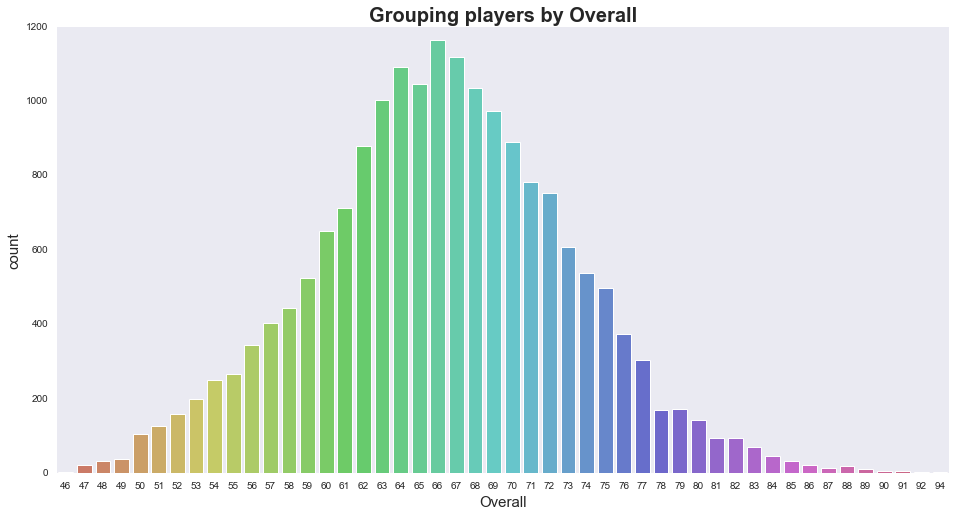

In [166]:
plt.figure(figsize=(16,8))
sns.set_style("dark")
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1,)
plt.xlabel('Overall of players', fontsize=15)
plt.ylabel('Number of players', fontsize=15)
sns.countplot(x="Overall", data=dataset, palette="hls");
plt.show()

In [162]:
# Selecting players with age smaller then 40 
dataset40 = dataset.loc[dataset['Age'] <= 40]
# Selecting unique Age from DataFrame
age = dataset40.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
overall = dataset40.groupby("Age")["Overall"].mean().values
# Selecting mean Overall from DataFrame
potential = dataset40.groupby("Age")["Potential"].mean().values

<Figure size 432x288 with 0 Axes>

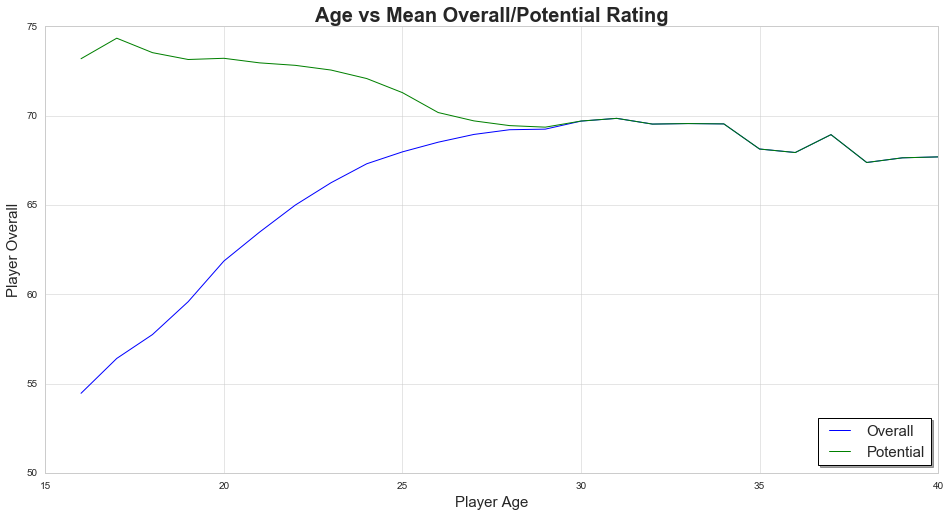

In [164]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Age vs Mean Overall/Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("dark")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()